In [104]:
!pip install optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import metrics

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import  CatBoostRegressor
from lightgbm import  LGBMRegressor

import optuna
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
data=pd.read_excel(r'regression_avito_deals.xlsx')

In [3]:
data_sample = data.sample(frac=0.1, random_state=0)

In [4]:
data_sample

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,deal_probability
156453,a3879e8f5a2a,18a380d74b7a,Татарстан,Казань,Недвижимость,Квартиры,Продам,1,Вторичка,"1-к квартира, 34 м², 4/5 эт.","Квартира 33,5 кв.м. с новым ремонтом (делали 6...",2250000.0,2,2017-03-27,Private,0.46445
642845,e237f6802266,76e504f48dd3,Самарская область,Самара,Бытовая электроника,"Игры, приставки и программы",Игры для приставок,NaN,NaN,SSX (PS3),Мы на АНТОШКЕ (ул.Антонова-Овсеенко 7Б)!!!/\n ...,590.0,747,2017-03-27,Shop,0.00000
640815,852f33347a37,70b4bb718d96,Нижегородская область,Нижний Новгород,Личные вещи,Детская одежда и обувь,Для девочек,Обувь,34,Сапожки на девочку. Размер 34-35,Новые. Внутри утепленные. Подойдут на худеньку...,500.0,26,2017-03-19,Company,0.00000
515907,296b5704bc7e,349d71669e6f,Новосибирская область,Новосибирск,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Обувь,38,"Ботинки ""Marko Tozzi""","Натуральная кожа,ортопедический каблук.Размер ...",500.0,4,2017-03-22,Private,0.00000
128138,c48e8c8c25a4,4e0b217b70b4,Красноярский край,Норильск,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Верхняя одежда,46–48 (L),Слингокуртка,"Весна- осень, слингокуртка для беременных и но...",3000.0,4,2017-03-20,Private,0.14983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257892,1606568e122d,c580d1acc86d,Красноярский край,Красноярск,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Платья и юбки,42–44 (S),Платье,NaN,1000.0,41,2017-03-20,Private,0.00000
29260,f8a1d4c7e088,f833b34a4629,Воронежская область,Россошь,Бытовая электроника,Аудио и видео,"Музыкальные центры, магнитолы",NaN,NaN,Магниторадиола Романтика-М,В рабочем состоянии,5000.0,1,2017-03-19,Private,0.08769
35742,66cfc1e0d543,033b16bf5df3,Иркутская область,Братск,Для дома и дачи,Мебель и интерьер,"Кровати, диваны и кресла",NaN,NaN,Мебель,Продам мебель дёшево!,NaN,1,2017-03-17,Private,0.86521
130812,7926e9408062,0aad4fbaf8cb,Краснодарский край,Сочи,Недвижимость,Квартиры,Продам,2,Вторичка,"2-к квартира, 41 м², 2/4 эт.",Квартира угловая. 5 витражных окон и 2 балкона...,3500000.0,2250,2017-03-17,Shop,0.02289


In [5]:
data_sample.describe(include = 'all')

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,deal_probability
count,75171,75171,75171,75171,75171,75171,72101,42430,31927,75171,69244,7.087200e+04,75171.000000,75171,75171,75171.000000
unique,75171,66728,28,1144,9,47,329,228,564,53723,67524,NaN,NaN,15,3,NaN
top,a3879e8f5a2a,45ba3f23bf25,Краснодарский край,Краснодар,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Обувь,Вторичка,Платье,В хорошем состоянии,NaN,NaN,2017-03-27,Private,NaN
freq,1,57,7001,3163,34680,14110,11321,7425,2499,801,122,NaN,NaN,5812,54064,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.383031e+06,736.540807,NaN,NaN,0.140289
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.986578e+08,5612.939964,NaN,NaN,0.261262
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+02,9.000000,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.300000e+03,29.000000,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000e+03,87.000000,NaN,NaN,0.153400


In [11]:
data_sample['activation_date'] = pd.to_datetime(data_sample['activation_date'], errors='coerce')

In [13]:
data_sample['activation_year'] = data_sample['activation_date'].dt.year
data_sample['activation_month'] = data_sample['activation_date'].dt.month
data_sample['activation_day'] = data_sample['activation_date'].dt.day
data_sample['activation_weekday'] = data_sample['activation_date'].dt.dayofweek

In [15]:
data_sample

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,deal_probability,activation_year,activation_month,activation_day,activation_weekday
156453,a3879e8f5a2a,18a380d74b7a,Татарстан,Казань,Недвижимость,Квартиры,Продам,1,Вторичка,"1-к квартира, 34 м², 4/5 эт.","Квартира 33,5 кв.м. с новым ремонтом (делали 6...",2250000.0,2,2017-03-27,Private,0.46445,2017,3,27,0
642845,e237f6802266,76e504f48dd3,Самарская область,Самара,Бытовая электроника,"Игры, приставки и программы",Игры для приставок,NaN,NaN,SSX (PS3),Мы на АНТОШКЕ (ул.Антонова-Овсеенко 7Б)!!!/\n ...,590.0,747,2017-03-27,Shop,0.00000,2017,3,27,0
640815,852f33347a37,70b4bb718d96,Нижегородская область,Нижний Новгород,Личные вещи,Детская одежда и обувь,Для девочек,Обувь,34,Сапожки на девочку. Размер 34-35,Новые. Внутри утепленные. Подойдут на худеньку...,500.0,26,2017-03-19,Company,0.00000,2017,3,19,6
515907,296b5704bc7e,349d71669e6f,Новосибирская область,Новосибирск,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Обувь,38,"Ботинки ""Marko Tozzi""","Натуральная кожа,ортопедический каблук.Размер ...",500.0,4,2017-03-22,Private,0.00000,2017,3,22,2
128138,c48e8c8c25a4,4e0b217b70b4,Красноярский край,Норильск,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Верхняя одежда,46–48 (L),Слингокуртка,"Весна- осень, слингокуртка для беременных и но...",3000.0,4,2017-03-20,Private,0.14983,2017,3,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257892,1606568e122d,c580d1acc86d,Красноярский край,Красноярск,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Платья и юбки,42–44 (S),Платье,NaN,1000.0,41,2017-03-20,Private,0.00000,2017,3,20,0
29260,f8a1d4c7e088,f833b34a4629,Воронежская область,Россошь,Бытовая электроника,Аудио и видео,"Музыкальные центры, магнитолы",NaN,NaN,Магниторадиола Романтика-М,В рабочем состоянии,5000.0,1,2017-03-19,Private,0.08769,2017,3,19,6
35742,66cfc1e0d543,033b16bf5df3,Иркутская область,Братск,Для дома и дачи,Мебель и интерьер,"Кровати, диваны и кресла",NaN,NaN,Мебель,Продам мебель дёшево!,NaN,1,2017-03-17,Private,0.86521,2017,3,17,4
130812,7926e9408062,0aad4fbaf8cb,Краснодарский край,Сочи,Недвижимость,Квартиры,Продам,2,Вторичка,"2-к квартира, 41 м², 2/4 эт.",Квартира угловая. 5 витражных окон и 2 балкона...,3500000.0,2250,2017-03-17,Shop,0.02289,2017,3,17,4


In [17]:
data_sample.drop(['item_id','user_id','category_name','param_1','param_2','param_3', 'region',
                                'city', 'description', 'title', 'item_seq_number', 'activation_date', 'activation_month', 'activation_year'], axis = 1, inplace=True)

In [19]:
data_sample.isnull().sum()

parent_category_name       0
price                   4299
user_type                  0
deal_probability           0
activation_day             0
activation_weekday         0
dtype: int64

In [21]:
rf_knn_data_sample = data_sample.copy()
boost_data_sample= data_sample.copy()

In [23]:
rf_knn_data_sample['price'].fillna(rf_knn_data_sample['price'].mean(), inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_13808\1042934510.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rf_knn_data_sample['price'].fillna(rf_knn_data_sample['price'].mean(), inplace=True)


In [25]:
rf_knn_data_sample.isnull().sum()

parent_category_name    0
price                   0
user_type               0
deal_probability        0
activation_day          0
activation_weekday      0
dtype: int64

In [27]:
rf_data_sample = rf_knn_data_sample.copy()
knn_data_sample = rf_knn_data_sample.copy()

## RF

In [30]:
rf_data_sample

,parent_category_name,price,user_type,deal_probability,activation_day,activation_weekday
156453,Недвижимость,2.250000e+06,Private,0.46445,27,0
642845,Бытовая электроника,5.900000e+02,Shop,0.00000,27,0
640815,Личные вещи,5.000000e+02,Company,0.00000,19,6
515907,Личные вещи,5.000000e+02,Private,0.00000,22,2
128138,Личные вещи,3.000000e+03,Private,0.14983,20,0
...,...,...,...,...,...,...
257892,Личные вещи,1.000000e+03,Private,0.00000,20,0
29260,Бытовая электроника,5.000000e+03,Private,0.08769,19,6
35742,Для дома и дачи,1.383031e+06,Private,0.86521,17,4
130812,Недвижимость,3.500000e+06,Shop,0.02289,17,4


In [32]:
rf_data_sample.isnull().sum()

parent_category_name    0
price                   0
user_type               0
deal_probability        0
activation_day          0
activation_weekday      0
dtype: int64

In [34]:
le = LabelEncoder()

for i in rf_data_sample.columns:
    rf_data_sample[i] = le.fit_transform(rf_data_sample[i])
rf_data_sample

,parent_category_name,price,user_type,deal_probability,activation_day,activation_weekday
156453,5,2426,1,4070,12,0
642845,0,255,2,0,12,0
640815,4,233,0,0,4,6
515907,4,233,1,0,7,2
128138,4,593,1,1235,5,0
...,...,...,...,...,...,...
257892,4,350,1,0,5,0
29260,0,746,1,555,4,6
35742,2,2230,1,4778,2,4
130812,5,2609,2,79,2,4


In [36]:
rf_data_sample


,parent_category_name,price,user_type,deal_probability,activation_day,activation_weekday
156453,5,2426,1,4070,12,0
642845,0,255,2,0,12,0
640815,4,233,0,0,4,6
515907,4,233,1,0,7,2
128138,4,593,1,1235,5,0
...,...,...,...,...,...,...
257892,4,350,1,0,5,0
29260,0,746,1,555,4,6
35742,2,2230,1,4778,2,4
130812,5,2609,2,79,2,4


## KNN 

In [39]:
knn_data_sample

,parent_category_name,price,user_type,deal_probability,activation_day,activation_weekday
156453,Недвижимость,2.250000e+06,Private,0.46445,27,0
642845,Бытовая электроника,5.900000e+02,Shop,0.00000,27,0
640815,Личные вещи,5.000000e+02,Company,0.00000,19,6
515907,Личные вещи,5.000000e+02,Private,0.00000,22,2
128138,Личные вещи,3.000000e+03,Private,0.14983,20,0
...,...,...,...,...,...,...
257892,Личные вещи,1.000000e+03,Private,0.00000,20,0
29260,Бытовая электроника,5.000000e+03,Private,0.08769,19,6
35742,Для дома и дачи,1.383031e+06,Private,0.86521,17,4
130812,Недвижимость,3.500000e+06,Shop,0.02289,17,4


In [41]:
knn_data_sample.isnull().sum()

parent_category_name    0
price                   0
user_type               0
deal_probability        0
activation_day          0
activation_weekday      0
dtype: int64

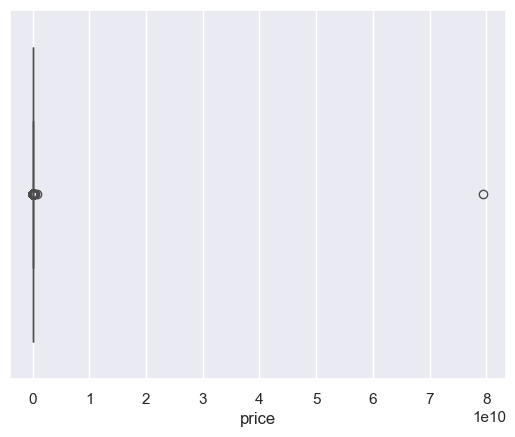

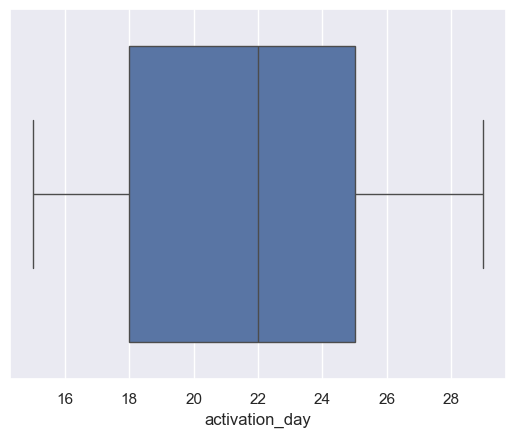

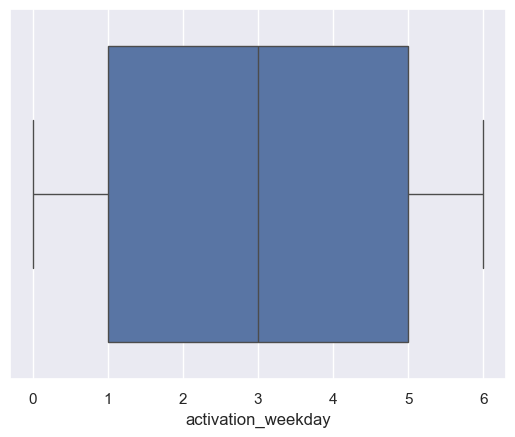

In [43]:
for i in knn_data_sample.columns:
    if knn_data_sample[i].dtypes!=object and i!='deal_probability':
        sns.boxplot(data=knn_data_sample,x=knn_data_sample[i])
        plt.show()

In [45]:
q1=knn_data_sample.quantile(0.25, numeric_only=True)
q3=knn_data_sample.quantile(0.75, numeric_only=True)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

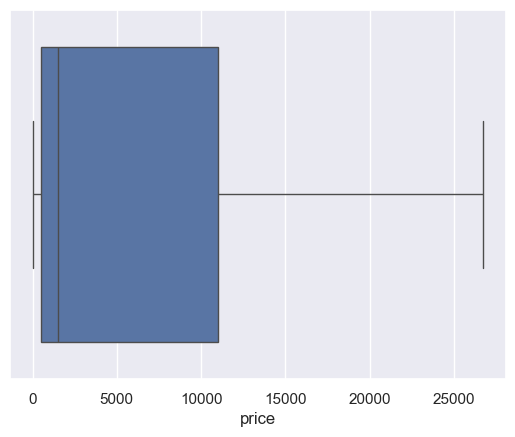

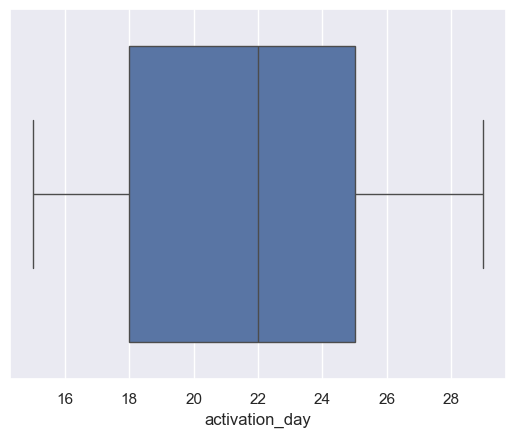

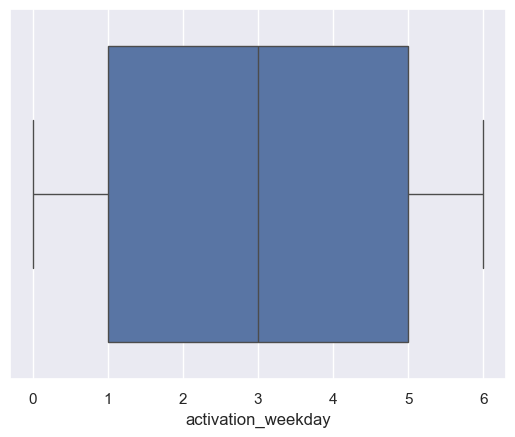

In [47]:
for i in knn_data_sample.columns:
    if knn_data_sample[i].dtypes!=object and i!='deal_probability':
        knn_data_sample[i] = np.where(knn_data_sample[i] > Upper[i],Upper[i],knn_data_sample[i])
        knn_data_sample[i] = np.where(knn_data_sample[i] < Lower[i],Lower[i],knn_data_sample[i])
        sns.boxplot(data=knn_data_sample,x=knn_data_sample[i])
        plt.show()

In [49]:
from scipy import stats


for i in knn_data_sample.columns:
    
    if knn_data_sample[i].dtype in ['int64', 'float64']:
        
        kstest_statistic, kstest_p_value = stats.kstest(knn_data_sample[i], 'norm')
        
        # 'norm' inside indicates that the test is comparing the distribution of the data against a normal distribution
        
        print(f'Column: {i}')
        print(f'p-value: {kstest_p_value}')
        
        if kstest_p_value > 0.05:
            print('Data looks normally distributed')
            print()
        else:
            print('Data does not look normally distributed')
            print()

Column: price
p-value: 0.0
Data does not look normally distributed

Column: deal_probability
p-value: 0.0
Data does not look normally distributed

Column: activation_day
p-value: 0.0
Data does not look normally distributed

Column: activation_weekday
p-value: 0.0
Data does not look normally distributed



In [51]:
def target_correlation(data, target, threshold=0.01):
    corr_matrix = knn_data_sample.corr(method='spearman', numeric_only=True)
    
    target_correlations = corr_matrix[target].abs() > threshold
    
    variables_explaining_target = target_correlations[target_correlations].index.tolist()

    variables_explaining_target.remove(target)
    
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
    result_explaining_target.reset_index(drop=True, inplace=True)
    
    return result_explaining_target

target_result = target_correlation(knn_data_sample, 'deal_probability')

target_result

,Variable,Correlation with Target
0,price,0.227070
1,activation_weekday,-0.012793


In [53]:
def intercorrelation(data, target, threshold=0.7):
    corr_matrix = data.drop(columns=[target]).corr(method='spearman', numeric_only=True)
    
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    
    independent_variable_pairs = np.where(highly_correlated_variables)
    
    result_intercorrelated_independent = pd.DataFrame({
        'Variable 1': corr_matrix.index[independent_variable_pairs[0]],
        'Variable 2': corr_matrix.columns[independent_variable_pairs[1]]
    })
    return result_intercorrelated_independent

intercorrelated_result = intercorrelation(knn_data_sample, 'deal_probability')

intercorrelated_result

,Variable 1,Variable 2


In [55]:
target_result.Variable.tolist()

['price', 'activation_weekday']

In [57]:
knn_data_sample.describe(include='all')

,parent_category_name,price,user_type,deal_probability,activation_day,activation_weekday
count,75171,75171.000000,75171,75171.000000,75171.000000,75171.000000
unique,9,NaN,3,NaN,NaN,NaN
top,Личные вещи,NaN,Private,NaN,NaN,NaN
freq,34680,NaN,54064,NaN,NaN,NaN
mean,NaN,7546.028029,NaN,0.140289,21.588259,2.950805
std,NaN,10387.223849,NaN,0.261262,4.048307,2.034170
min,NaN,0.000000,NaN,0.000000,15.000000,0.000000
25%,NaN,500.000000,NaN,0.000000,18.000000,1.000000
50%,NaN,1500.000000,NaN,0.000000,22.000000,3.000000
75%,NaN,11000.000000,NaN,0.153400,25.000000,5.000000


In [59]:
knn_data_sample['user_type'] = le.fit_transform(knn_data_sample['user_type'].astype(str))
knn_data_sample['parent_category_name'] = le.fit_transform(knn_data_sample['parent_category_name'].astype(str))

In [63]:
knn_data_sample

,parent_category_name,price,user_type,deal_probability,activation_day,activation_weekday
156453,5,26750.0,1,0.46445,27.0,0.0
642845,0,590.0,2,0.00000,27.0,0.0
640815,4,500.0,0,0.00000,19.0,6.0
515907,4,500.0,1,0.00000,22.0,2.0
128138,4,3000.0,1,0.14983,20.0,0.0
...,...,...,...,...,...,...
257892,4,1000.0,1,0.00000,20.0,0.0
29260,0,5000.0,1,0.08769,19.0,6.0
35742,2,26750.0,1,0.86521,17.0,4.0
130812,5,26750.0,2,0.02289,17.0,4.0


## LightGBM, XGBoost, CatBoost

In [65]:
boost_data_sample

,parent_category_name,price,user_type,deal_probability,activation_day,activation_weekday
156453,Недвижимость,2250000.0,Private,0.46445,27,0
642845,Бытовая электроника,590.0,Shop,0.00000,27,0
640815,Личные вещи,500.0,Company,0.00000,19,6
515907,Личные вещи,500.0,Private,0.00000,22,2
128138,Личные вещи,3000.0,Private,0.14983,20,0
...,...,...,...,...,...,...
257892,Личные вещи,1000.0,Private,0.00000,20,0
29260,Бытовая электроника,5000.0,Private,0.08769,19,6
35742,Для дома и дачи,NaN,Private,0.86521,17,4
130812,Недвижимость,3500000.0,Shop,0.02289,17,4


In [71]:
boost_data_sample.isnull().sum()

parent_category_name       0
price                   4299
user_type                  0
deal_probability           0
activation_day             0
activation_weekday         0
dtype: int64

In [67]:
num_boost_data_sample = boost_data_sample.copy()
cat_boost_data_sample = boost_data_sample.copy()

In [73]:
for i in num_boost_data_sample.columns:
    num_boost_data_sample[i] = le.fit_transform(num_boost_data_sample[i])
num_boost_data_sample

,parent_category_name,price,user_type,deal_probability,activation_day,activation_weekday
156453,5,2425,1,4070,12,0
642845,0,255,2,0,12,0
640815,4,233,0,0,4,6
515907,4,233,1,0,7,2
128138,4,593,1,1235,5,0
...,...,...,...,...,...,...
257892,4,350,1,0,5,0
29260,0,746,1,555,4,6
35742,2,2884,1,4778,2,4
130812,5,2608,2,79,2,4


## Model creating

In [82]:
inputs_knn = knn_data_sample.drop('deal_probability', axis=1)
inputs_rf = rf_data_sample.drop('deal_probability', axis=1)
inputs_nb = num_boost_data_sample.drop('deal_probability', axis=1)
inputs_cbc = cat_boost_data_sample.drop('deal_probability', axis=1)


In [86]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(inputs_knn, knn_data_sample['deal_probability'], test_size=0.3, random_state=42)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(inputs_rf, rf_data_sample['deal_probability'], test_size=0.3, random_state=42)
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(inputs_nb, num_boost_data_sample['deal_probability'], test_size=0.3, random_state=42)
X_train_cbc, X_test_cbc, y_train_cbc, y_test_cbc = train_test_split(inputs_cbc, cat_boost_data_sample['deal_probability'], test_size=0.3, random_state=42)


In [88]:
for i in cat_boost_data_sample.columns:
    if cat_boost_data_sample[i].dtypes==object:
        print(i)

parent_category_name
user_type


In [92]:
def evaluate_model_with_train_test(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    return {
        "Model": model_name,
        
        "Train_MSE": mse_train,
        "Train_RMSE": rmse_train,
        "Train_MAE": mae_train,
        "Train_R2": r2_train,
        
        
        "Test_MSE": mse_test,
        "Test_RMSE": rmse_test,
        "Test_MAE": mae_test,
        "Test_R2": r2_test
    }

In [94]:
results = []

# KNN
results.append(evaluate_model_with_train_test(KNeighborsRegressor(), X_train_knn, X_test_knn, y_train_knn, y_test_knn, "KNN"))

# Random Forest
results.append(evaluate_model_with_train_test(RandomForestRegressor(random_state=42), X_train_rf, X_test_rf, y_train_rf, y_test_rf, "Random Forest"))

# XGBoost
results.append(evaluate_model_with_train_test(XGBRegressor(random_state=42), X_train_nb, X_test_nb, y_train_nb, y_test_nb, "XGBoost"))

# LightGBM
results.append(evaluate_model_with_train_test(LGBMRegressor(random_state=42), X_train_nb, X_test_nb, y_train_nb, y_test_nb, "LightGBM"))

# CatBoost_Def
results.append(evaluate_model_with_train_test(CatBoostRegressor(verbose=0, random_state=42), X_train_nb, X_test_nb, y_train_nb, y_test_nb, "CatBoost_Num"))

# CatBoost_cat
categorical_features = ['parent_category_name', 'user_type']
results.append(evaluate_model_with_train_test(CatBoostRegressor(cat_features=categorical_features, verbose=0, random_state=42),
                              X_train_cbc, X_test_cbc, y_train_cbc, y_test_cbc, "CatBoost_cat"))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 289
[LightGBM] [Info] Number of data points in the train set: 52619, number of used features: 5
[LightGBM] [Info] Start training from score 963.270739


In [137]:
df_results = pd.DataFrame(results)
df_results

,Model,Train_MSE,Train_RMSE,Train_MAE,Train_R2,Test_MSE,Test_RMSE,Test_MAE,Test_R2
0,KNN,5.852280e-02,0.241915,0.158406,0.138571,7.197411e-02,0.268280,0.178330,-0.043091
1,Random Forest,1.600694e+06,1265.185379,864.491814,0.414987,2.743868e+06,1656.462632,1182.099335,0.009214
2,XGBoost,2.132687e+06,1460.372363,1081.064042,0.220558,2.395454e+06,1547.725298,1149.422682,0.135024
3,LightGBM,2.242067e+06,1497.353215,1120.563420,0.180582,2.335851e+06,1528.349033,1145.993405,0.156546
4,CatBoost_Num,2.195865e+06,1481.845074,1103.730292,0.197468,2.349731e+06,1532.883335,1144.648133,0.151534
5,CatBoost_cat,5.752932e-02,0.239853,0.165416,0.153195,5.975731e-02,0.244453,0.168588,0.133962


## OPTUNA

In [101]:
# XGBoost
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_int('gamma', 0, 10)
    }

    xgboost = XGBRegressor(**param)
    r2 = cross_val_score(xgboost, X_train_nb, y_train_nb, cv=3, scoring='r2', n_jobs=-1).mean()
    return r2



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=20)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_xgb_model = XGBRegressor(**best_params)

[I 2025-11-18 20:45:00,714] A new study created in memory with name: no-name-51ed66f6-d179-4bb8-b912-02e7d698e577
[I 2025-11-18 20:45:03,928] Trial 0 finished with value: 0.14274223645528158 and parameters: {'n_estimators': 135, 'learning_rate': 0.042460002026318375, 'max_depth': 8, 'subsample': 0.5661219368959038, 'colsample_bytree': 0.9833602097284586, 'gamma': 6}. Best is trial 0 with value: 0.14274223645528158.
[I 2025-11-18 20:45:08,193] Trial 1 finished with value: 0.15048535664876303 and parameters: {'n_estimators': 820, 'learning_rate': 0.045326943381082827, 'max_depth': 3, 'subsample': 0.7266246373135503, 'colsample_bytree': 0.9927139685383621, 'gamma': 1}. Best is trial 1 with value: 0.15048535664876303.
[I 2025-11-18 20:45:15,020] Trial 2 finished with value: 0.10365509986877441 and parameters: {'n_estimators': 869, 'learning_rate': 0.07553549910480761, 'max_depth': 10, 'subsample': 0.5141090543228723, 'colsample_bytree': 0.5029597025281378, 'gamma': 2}. Best is trial 1 with

Best trial:
  Value: 0.152
  Params:  {'n_estimators': 817, 'learning_rate': 0.011163140766562118, 'max_depth': 4, 'subsample': 0.6481303828614599, 'colsample_bytree': 0.9063320583343977, 'gamma': 9}


In [103]:
# LightGBM

def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100)
    }

    lgboost = LGBMRegressor(**param, random_state=42, n_jobs=-1, verbose=-1)
    r2 = cross_val_score(lgboost, X_train_nb, y_train_nb, cv=3, scoring='r2', n_jobs=-1).mean()
    return r2

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=15)

print('Best trial:')
best_params = study.best_params
print('  R2 Score: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_lgb_model = LGBMRegressor(**best_params, random_state=42, n_jobs=-1, verbose=-1)

[I 2025-11-18 20:46:38,988] A new study created in memory with name: no-name-d8fdf269-853a-44ef-96c9-6a9f075213e5
[I 2025-11-18 20:46:41,795] Trial 0 finished with value: 0.1306116204744069 and parameters: {'n_estimators': 147, 'learning_rate': 0.012631390122694855, 'max_depth': 5, 'num_leaves': 91, 'subsample': 0.6734246066817974, 'colsample_bytree': 0.6986312121391618, 'reg_alpha': 2.228489771747717, 'reg_lambda': 8.83312737070066, 'min_child_samples': 77}. Best is trial 0 with value: 0.1306116204744069.
[I 2025-11-18 20:46:45,087] Trial 1 finished with value: 0.14775876609001048 and parameters: {'n_estimators': 424, 'learning_rate': 0.030459153061057738, 'max_depth': 6, 'num_leaves': 91, 'subsample': 0.9133935623283851, 'colsample_bytree': 0.946758268917581, 'reg_alpha': 2.9720664235399274, 'reg_lambda': 3.533609502170841, 'min_child_samples': 53}. Best is trial 1 with value: 0.14775876609001048.
[I 2025-11-18 20:46:46,542] Trial 2 finished with value: 0.1446661911265261 and paramet

Best trial:
  R2 Score: 0.151
  Params:  {'n_estimators': 514, 'learning_rate': 0.01683699578635277, 'max_depth': 5, 'num_leaves': 32, 'subsample': 0.7619346521239859, 'colsample_bytree': 0.9344605957713996, 'reg_alpha': 0.41618892179131506, 'reg_lambda': 2.0811523519830177, 'min_child_samples': 90}


In [107]:
# CatBoost
def best_params_for_model(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_strength': trial.suggest_float('random_strength', 0, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 10),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations', 1, 10)
    }

    cat_num = CatBoostRegressor(
        **param,
        random_state=42,
        verbose=False,
        thread_count=-1
    )
    
    r2 = cross_val_score(cat_num, X_train_nb, y_train_nb, cv=3, scoring='r2', n_jobs=-1).mean()
    return r2

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  R2 Score: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cat_model = CatBoostRegressor(
    **best_params,
    random_state=42,
    verbose=False,
    thread_count=-1
)

[I 2025-11-18 20:47:47,490] A new study created in memory with name: no-name-a14a4ac7-e1ae-46a2-8cec-5f22b2ded887
[I 2025-11-18 20:48:04,009] Trial 0 finished with value: 0.14810350318921275 and parameters: {'iterations': 772, 'learning_rate': 0.05108362167492512, 'depth': 6, 'l2_leaf_reg': 3.1788389710282487, 'random_strength': 1.571460536584126, 'bagging_temperature': 1.8613579024244675, 'leaf_estimation_iterations': 9}. Best is trial 0 with value: 0.14810350318921275.


Best trial:
  R2 Score: 0.148
  Params:  {'iterations': 772, 'learning_rate': 0.05108362167492512, 'depth': 6, 'l2_leaf_reg': 3.1788389710282487, 'random_strength': 1.571460536584126, 'bagging_temperature': 1.8613579024244675, 'leaf_estimation_iterations': 9}


In [119]:
# CatBoost Categorical
def best_params_for_model(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_strength': trial.suggest_float('random_strength', 0, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 10),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations', 1, 10)
    }

    cbc_model = CatBoostRegressor(
        **param,
        cat_features=['parent_category_name', 'user_type'],
        random_state=42,
        verbose=False,
        thread_count=-1
    )
    
    r2 = cross_val_score(cbc_model, X_train_cbc, y_train_cbc, cv=3, scoring='r2', n_jobs=-1).mean()
    return r2

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  R2 Score: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cbc_model = CatBoostRegressor(
    **best_params,
    cat_features=['parent_category_name', 'user_type'],
    random_state=42,
    verbose=False,
    thread_count=-1
)

[I 2025-11-18 20:55:15,540] A new study created in memory with name: no-name-f27088ac-faf5-4c4b-b229-7585aeb0e673
[I 2025-11-18 20:56:01,214] Trial 0 finished with value: 0.12655042373427364 and parameters: {'iterations': 633, 'learning_rate': 0.010373872307243287, 'depth': 6, 'l2_leaf_reg': 9.029726301105205, 'random_strength': 0.9091995579038903, 'bagging_temperature': 8.24279038113996, 'leaf_estimation_iterations': 5}. Best is trial 0 with value: 0.12655042373427364.


Best trial:
  R2 Score: 0.127
  Params:  {'iterations': 633, 'learning_rate': 0.010373872307243287, 'depth': 6, 'l2_leaf_reg': 9.029726301105205, 'random_strength': 0.9091995579038903, 'bagging_temperature': 8.24279038113996, 'leaf_estimation_iterations': 5}


In [109]:
# Random Forest Regression
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }

    rf_model = RandomForestRegressor(**param, random_state=42, n_jobs=-1)
    r2 = cross_val_score(rf_model, X_train_rf, y_train_rf, cv=3, scoring='r2', n_jobs=-1).mean()
    return r2

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  R2 Score: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_rf_model = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)

[I 2025-11-18 20:48:12,183] A new study created in memory with name: no-name-e089f6a8-116c-4cdc-a480-8b2766ce0e6f
[I 2025-11-18 20:48:19,407] Trial 0 finished with value: 0.14260131917362173 and parameters: {'n_estimators': 255, 'max_depth': 12, 'min_samples_split': 18, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.14260131917362173.
[I 2025-11-18 20:48:22,797] Trial 1 finished with value: 0.12435291525185647 and parameters: {'n_estimators': 232, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.14260131917362173.
[I 2025-11-18 20:48:29,758] Trial 2 finished with value: 0.14165898225879883 and parameters: {'n_estimators': 259, 'max_depth': 14, 'min_samples_split': 17, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.14260131917362173.
[I 2025-11-18 20:48:39,978] Trial 3 finished with value: 0.130719586

Best trial:
  R2 Score: 0.146
  Params:  {'n_estimators': 468, 'max_depth': 11, 'min_samples_split': 14, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': False}


In [111]:
# KNN Regression
def best_params_for_model(trial):
    param = {
        'n_neighbors': trial.suggest_int('n_neighbors', 3, 50), 
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),  
        'algorithm': trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),  
        'leaf_size': trial.suggest_int('leaf_size', 10, 100),  
        'p': trial.suggest_int('p', 1, 2),  
        'metric': trial.suggest_categorical('metric', ['minkowski', 'euclidean', 'manhattan']) 
    }

    knn_reg = KNeighborsRegressor(**param, n_jobs=-1)

    r2 = cross_val_score(knn_reg, X_train_knn, y_train_knn, cv=3, scoring='r2', n_jobs=-1).mean()
    return r2

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  R2 Score: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_knn_model = KNeighborsRegressor(**best_params, n_jobs=-1)

[I 2025-11-18 20:50:51,544] A new study created in memory with name: no-name-e8e93320-dbe1-4887-8c4c-d2dcedb0aa1f
[I 2025-11-18 20:50:54,986] Trial 0 finished with value: 0.05405038414814345 and parameters: {'n_neighbors': 27, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 87, 'p': 2, 'metric': 'euclidean'}. Best is trial 0 with value: 0.05405038414814345.
[I 2025-11-18 20:50:55,922] Trial 1 finished with value: -0.05429409900102936 and parameters: {'n_neighbors': 33, 'weights': 'distance', 'algorithm': 'ball_tree', 'leaf_size': 63, 'p': 1, 'metric': 'manhattan'}. Best is trial 0 with value: 0.05405038414814345.
[I 2025-11-18 20:50:56,562] Trial 2 finished with value: 0.05137757429970491 and parameters: {'n_neighbors': 22, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 10, 'p': 1, 'metric': 'minkowski'}. Best is trial 0 with value: 0.05405038414814345.
[I 2025-11-18 20:50:57,473] Trial 3 finished with value: -0.05181475851754991 and parameters: {'n_neighbors': 49,

Best trial:
  R2 Score: 0.056
  Params:  {'n_neighbors': 32, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 63, 'p': 2, 'metric': 'manhattan'}


In [120]:
opt_results = []


opt_results.extend([
    evaluate_model_with_train_test(best_xgb_model, X_train_nb, X_test_nb, y_train_nb, y_test_nb, "XGBoost_Optimal"),
    evaluate_model_with_train_test(best_lgb_model, X_train_nb, X_test_nb, y_train_nb, y_test_nb, "LightGBM_Optimal"),
    evaluate_model_with_train_test(best_cat_model, X_train_nb, X_test_nb, y_train_nb, y_test_nb, "CatBoost_Optimal"),
    evaluate_model_with_train_test(best_knn_model, X_train_knn, X_test_knn, y_train_knn, y_test_knn, "KNN_Optimal"),
    evaluate_model_with_train_test(best_rf_model, X_train_rf, X_test_rf, y_train_rf, y_test_rf, "RF_Optimal"),
    evaluate_model_with_train_test(best_cbc_model, X_train_cbc, X_test_cbc, y_train_cbc, y_test_cbc, "Catboost_Categoric_Optimal"),

])

opt_results_df = pd.DataFrame(opt_results).sort_values('Test_R2', ascending=False)
opt_results_df

,Model,Train_MSE,Train_RMSE,Train_MAE,Train_R2,Test_MSE,Test_RMSE,Test_MAE,Test_R2
0,XGBoost_Optimal,2.292209e+06,1514.004182,1136.659095,0.162257,2.332250e+06,1527.170681,1148.352995,0.157846
1,LightGBM_Optimal,2.280381e+06,1510.092886,1131.676178,0.166579,2.334398e+06,1527.873737,1147.029687,0.157070
2,CatBoost_Optimal,2.233239e+06,1494.402606,1116.043292,0.183808,2.340218e+06,1529.776971,1145.156514,0.154969
4,RF_Optimal,2.196244e+06,1481.972918,1110.240520,0.197329,2.347679e+06,1532.213876,1150.841443,0.152275
5,Catboost_Categoric_Optimal,5.902198e-02,0.242944,0.168443,0.131224,5.983503e-02,0.244612,0.169673,0.132835
3,KNN_Optimal,6.048102e-02,0.245929,0.170483,0.109747,6.486260e-02,0.254681,0.177138,0.059973


In [125]:
opt_results_df.T

,0,1,2,4,5,3
Model,XGBoost_Optimal,LightGBM_Optimal,CatBoost_Optimal,RF_Optimal,Catboost_Categoric_Optimal,KNN_Optimal
Train_MSE,2292208.662284,2280380.524337,2233239.150077,2196243.729506,0.059022,0.060481
Train_RMSE,1514.004182,1510.092886,1494.402606,1481.972918,0.242944,0.245929
Train_MAE,1136.659095,1131.676178,1116.043292,1110.24052,0.168443,0.170483
Train_R2,0.162257,0.166579,0.183808,0.197329,0.131224,0.109747
Test_MSE,2332250.290151,2334398.156374,2340217.581097,2347679.362006,0.059835,0.064863
Test_RMSE,1527.170681,1527.873737,1529.776971,1532.213876,0.244612,0.254681
Test_MAE,1148.352995,1147.029687,1145.156514,1150.841443,0.169673,0.177138
Test_R2,0.157846,0.15707,0.154969,0.152275,0.132835,0.059973


In [139]:
all_results_df = pd.concat([df_results, opt_results_df], ignore_index=True)

all_results_df = all_results_df.sort_values('Test_R2', ascending=False)

all_results_df

,Model,Train_MSE,Train_RMSE,Train_MAE,Train_R2,Test_MSE,Test_RMSE,Test_MAE,Test_R2
6,XGBoost_Optimal,2.292209e+06,1514.004182,1136.659095,0.162257,2.332250e+06,1527.170681,1148.352995,0.157846
7,LightGBM_Optimal,2.280381e+06,1510.092886,1131.676178,0.166579,2.334398e+06,1527.873737,1147.029687,0.157070
3,LightGBM,2.242067e+06,1497.353215,1120.563420,0.180582,2.335851e+06,1528.349033,1145.993405,0.156546
8,CatBoost_Optimal,2.233239e+06,1494.402606,1116.043292,0.183808,2.340218e+06,1529.776971,1145.156514,0.154969
9,RF_Optimal,2.196244e+06,1481.972918,1110.240520,0.197329,2.347679e+06,1532.213876,1150.841443,0.152275
4,CatBoost_Num,2.195865e+06,1481.845074,1103.730292,0.197468,2.349731e+06,1532.883335,1144.648133,0.151534
2,XGBoost,2.132687e+06,1460.372363,1081.064042,0.220558,2.395454e+06,1547.725298,1149.422682,0.135024
5,CatBoost_cat,5.752932e-02,0.239853,0.165416,0.153195,5.975731e-02,0.244453,0.168588,0.133962
10,Catboost_Categoric_Optimal,5.902198e-02,0.242944,0.168443,0.131224,5.983503e-02,0.244612,0.169673,0.132835
11,KNN_Optimal,6.048102e-02,0.245929,0.170483,0.109747,6.486260e-02,0.254681,0.177138,0.059973


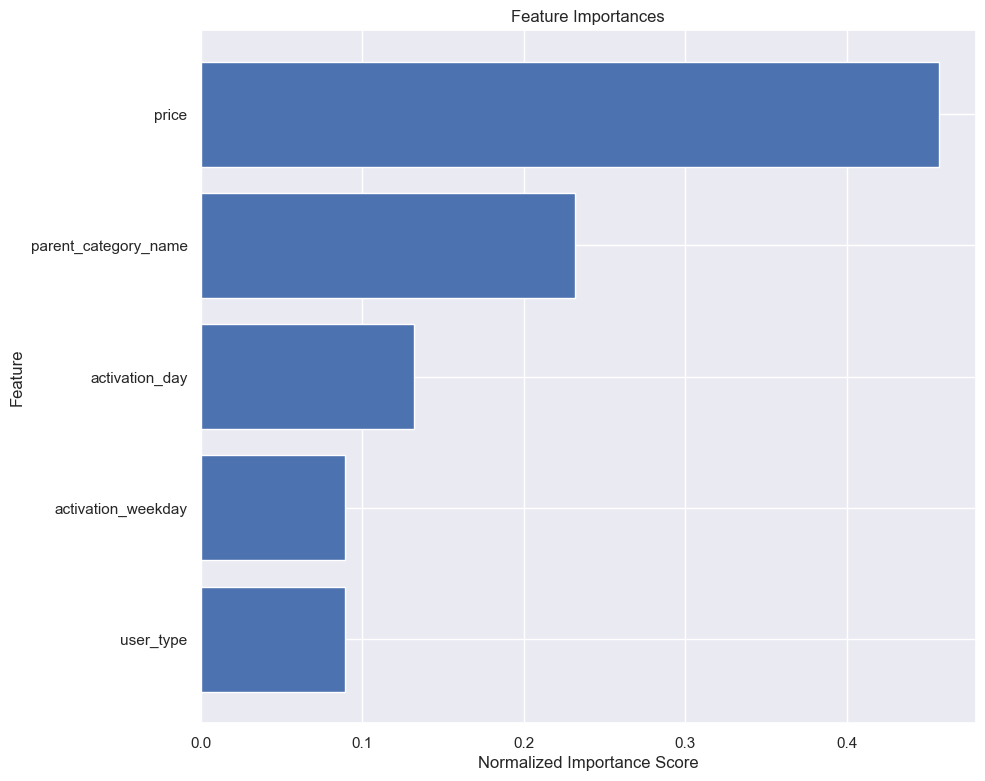

,Feature,Importance
1,price,0.457056
0,parent_category_name,0.232050
3,activation_day,0.131994
4,activation_weekday,0.089570
2,user_type,0.089330


In [159]:
import matplotlib.pyplot as plt

importances = best_lgb_model.feature_importances_


importances = importances / importances.sum()

importance_df = pd.DataFrame({
        'Feature':  X_train_nb.columns,
        'Importance': importances
    }).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 9))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title("Feature Importances")
plt.xlabel("Normalized Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()


importance_df

In [161]:
importance_df.Feature.tolist()

['price',
 'parent_category_name',
 'activation_day',
 'activation_weekday',
 'user_type']

SHAP Values Summary (Selected Features)


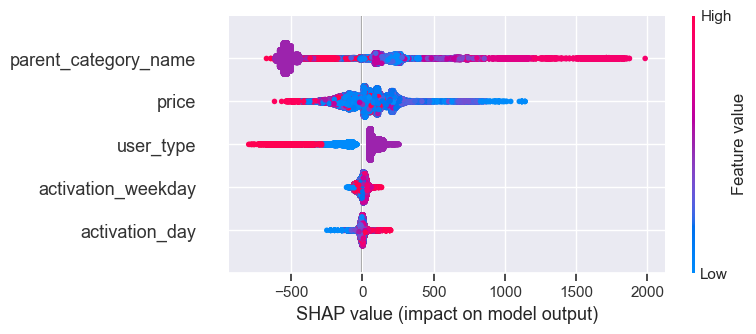

In [163]:
import shap

selected_features = [
 'price',
 'parent_category_name',
 'activation_day',
 'activation_weekday',
 'user_type']

explainer = shap.TreeExplainer(best_lgb_model)
shap_values = explainer.shap_values(X_train_nb)


shap_df = pd.DataFrame(shap_values, columns=X_train_nb.columns)
shap_selected = shap_df[selected_features]
X_selected = X_train_nb[selected_features]


print("SHAP Values Summary (Selected Features)")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_selected.values, X_selected, show=False)
plt.tight_layout()
plt.show()

In [165]:
evaluate_model_with_train_test(best_lgb_model, X_train_nb[[
 'price',
 'parent_category_name',
 'activation_day',
 'activation_weekday',
 'user_type']],
                               X_test_nb[[
 'price',
 'parent_category_name',
 'activation_day',
 'activation_weekday',
 'user_type']], y_train_nb, y_test_nb, "LightGBM_import")


{'Model': 'LightGBM_import',
 'Train_MSE': 2280380.5243371897,
 'Train_RMSE': 1510.0928859964838,
 'Train_MAE': 1131.6761782253577,
 'Train_R2': 0.1665794435665232,
 'Test_MSE': 2334398.156373658,
 'Test_RMSE': 1527.8737370521355,
 'Test_MAE': 1147.0296873102855,
 'Test_R2': 0.15707030085761642}

In [167]:
from sklearn.ensemble import VotingRegressor


In [169]:
best_models = [
    ('XGBoost_Model', best_xgb_model),
    ('CatBoost_Model', best_cat_model),
    ('LightGBM_Model', best_lgb_model)
]

voting_reg = VotingRegressor(estimators=best_models)

In [171]:
voting_reg.fit(X_train_nb, y_train_nb)


VotingRegressor(estimators=[('XGBoost_Model',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.9063320583343977,
                                          device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=9,
                                          grow_policy=None,
                                          importance_type=None,...
                             <catboost.core.CatBoostRegressor object at 0x000001B6C471CAD0>),
                            ('LightGBM_Model',
                             LGBMRegressor(colsample_bytree=0.9344605957713996,
                                           learning_rate=0.01683699578635277,
                                           max_depth=5, min_child_samples=90,
                                           n_estimators=514, n_jobs=-1,
                                           num_leaves=32, random_state=42,
                                           reg_alpha=0.41618892179131506,
                                           reg_lambda=2.0811523519830177,
                                           subsample=0.7619346521239859,
                                           verbose=-1))])

In [175]:
voting_results = evaluate_model_with_train_test(
    voting_reg,
    X_train_nb, X_test_nb,
    y_train_nb, y_test_nb,
    "Voting_Regressor"
)

results.append(voting_results)

In [177]:
voting_results


{'Model': 'Voting_Regressor',
 'Train_MSE': 2265415.4584620474,
 'Train_RMSE': 1505.1297148292726,
 'Train_MAE': 1127.7381677702892,
 'Train_R2': 0.1720487910704228,
 'Test_MSE': 2332361.6778885047,
 'Test_RMSE': 1527.2071496324606,
 'Test_MAE': 1146.4602573676166,
 'Test_R2': 0.1578056545041714}